In [88]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import numpy as np 
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 

In [89]:
housing = pd.read_csv(r"E:\Adv Analytics\Datasets\Housing.csv")
housing

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [90]:
dum_house = pd.get_dummies(housing , drop_first=True)

In [91]:
dum_house

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,5850,3,1,2,1,1,0,1,0,0,0
1,38500.0,4000,2,1,1,0,1,0,0,0,0,0
2,49500.0,3060,3,1,1,0,1,0,0,0,0,0
3,60500.0,6650,3,1,2,0,1,1,0,0,0,0
4,61000.0,6360,2,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,0,1,1,0,0,1,0
542,94000.0,6000,3,2,4,0,1,0,0,0,1,0
543,103000.0,6000,3,2,4,1,1,1,0,0,1,0
544,105000.0,6000,3,2,2,1,1,1,0,0,1,0


In [92]:
train,test = train_test_split(dum_house , test_size =0.3 , random_state=23)


In [93]:
x_train = train.drop('price', axis=1)
y_train = train['price']

In [94]:
x_test = test.drop('price', axis=1)
y_test = test['price']

In [95]:
dtr = DecisionTreeRegressor( random_state = 23 , max_depth =3)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=23)

### Drawing a Tree

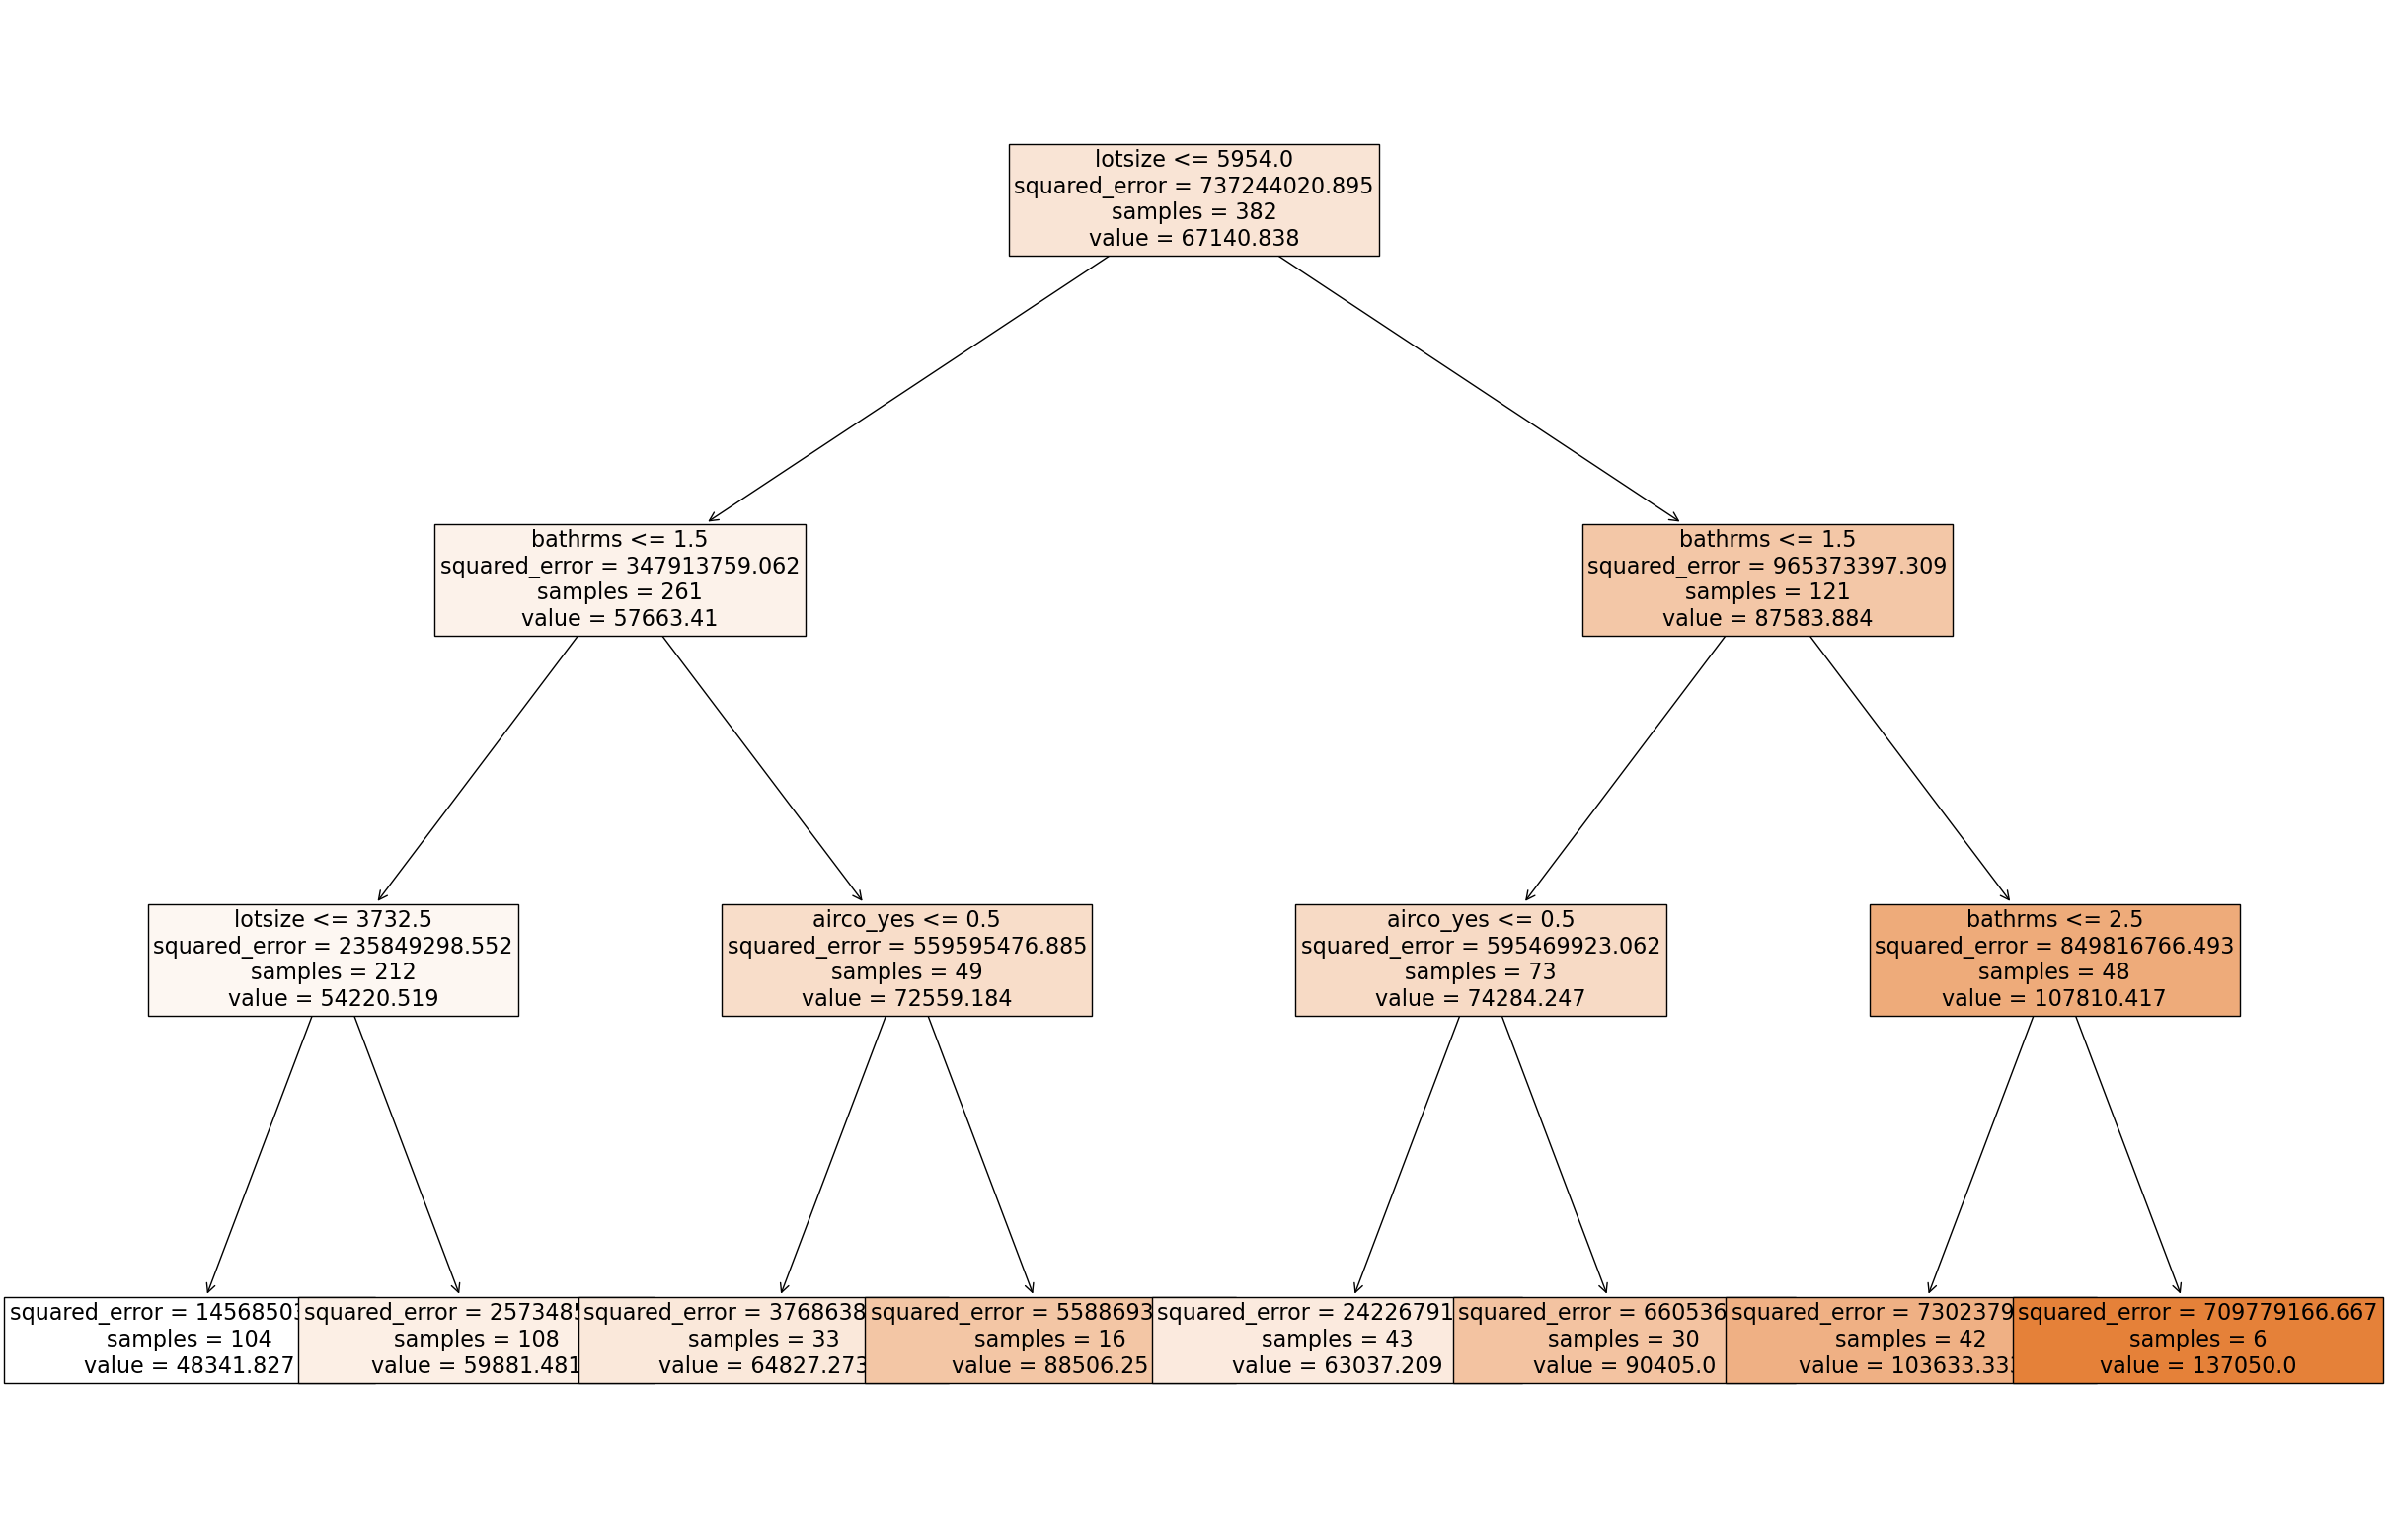

In [96]:
plt.figure(figsize=(30,20))
tree.plot_tree(dtr,feature_names=x_train.columns , filled=True ,fontsize=16)
plt.show()

#### Getting the part of the tree

In [97]:
y_train.mean()

67140.83769633507

In [98]:
left_ds = train[train['lotsize']<=5954]
right_ds = train[train['lotsize']>5954]
left_ds['price'].mean()


57663.40996168582

In [99]:
right_ds['price'].mean()

87583.88429752066

In [100]:
np.mean((y_train - y_train.mean())**2)

737244020.8951236

### Predicting on the test set

In [101]:
y_pred = dtr.predict(x_test)
print(r2_score(y_test, y_pred))

0.5166553666791676


### Different Values of depth

In [102]:
depths = [2,3,4,5,6,7,8,9,10,11]
scores=[]
for i in depths:
    dtr = DecisionTreeRegressor( random_state = 23, max_depth=i)
    dtr.fit(x_train,y_train)
    y_pred = dtr.predict(x_test)
    scores.append(r2_score(y_test,y_pred))
    
max_score= np.max(scores)
i_max =np.argmax(scores)
best_depth =depths[i_max]
print("Best Depth = ",best_depth)
print("Best Score=" , max_score)



Best Depth =  3
Best Score= 0.5166553666791676


## Reg_tree_2

In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [104]:
sals = pd.read_csv(r"E:\Adv Analytics\Datasets\Exp_Salaries.csv")
sals

,Salary,Years_Previous_Experience,Years_Employed,Years_Education,Gender,Department,Number_Supervised
0,32782,1,0,7,Male,A,0
1,32920,3,15,9,Female,A,4
2,29548,6,5,1,Male,A,0
3,39828,6,18,5,Female,A,5
4,31528,11,3,3,Male,A,6
5,38985,7,18,9,Male,A,5
6,41889,16,22,7,Male,A,7
7,38791,4,21,5,Male,A,9
8,28985,1,0,4,Female,A,4
9,24749,2,6,0,Female,A,1


In [105]:
dum_sals = pd.get_dummies(sals, drop_first=True)

In [106]:
train,test = train_test_split(dum_sals ,test_size =0.3,random_state=23)
x_train= train.drop('Salary' , axis =1)
y_train = train['Salary']

In [107]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
x_test=test.drop('Salary',axis=1)
y_pred = lr.predict(x_test)
y_test = test['Salary']

In [109]:
y_pred

array([34901.02813361, 45706.4259041 , 45277.03378005, 35793.38220549,
       37093.41315058, 33293.73220253, 43555.61920305, 23490.07405081,
       36391.6469646 , 37723.40011915, 35624.98933259, 33755.35183844,
       37209.53582672, 43749.57549237])

In [110]:
y_test

13    43674
17    56326
37    46211
29    35487
28    34869
30    26548
23    47536
8     28985
33    36512
36    34632
14    36431
10    35467
3     39828
44    41255
Name: Salary, dtype: int64

In [111]:
print(r2_score(y_test, y_pred))

0.5989013155313918


### Different values of depth

In [124]:
depths=[2,3,4,5,6,7,8,9,10,11]
scores=[]
for i in depths:
    dtr=DecisionTreeRegressor(random_state =23,max_depth=i)
    dtr.fit(x_train,y_train)
    y_pred=dtr.predict(x_test)
    scores.append(r2_score(y_test,y_pred))
max_score = np.max(scores)
i_max = np.argmax(scores)
best_depth =depths[i_max]
print("Best Depth",best_depth)
print("Best score", max_score)

Best Depth 2
Best score 0.4538295649046079
